# Handwritten digits classification using neural network
In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Loading training and testing data set 

In [4]:

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 13s 1us/step


In [8]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

60000
10000
60000
10000


In [11]:
x_train[0].shape


(28, 28)

In [13]:
#x_train[9]

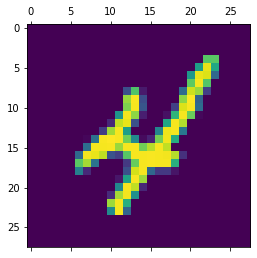

In [14]:
plt.matshow(x_train[9])

In [15]:
y_train[9]

4

# Scale image using Devide Function 

In [29]:
x_train = x_train / 255
x_test = x_test / 255

In [30]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [31]:
x_train_flattened.shape

(60000, 784)

In [32]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Main Model

In [43]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
             metrics= ['accuracy'])
model.fit(x_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4679 - accuracy: 0.8791
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3038 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2833 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2732 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2671 - accuracy: 0.9253


In [44]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 836us/step - loss: 0.2673 - accuracy: 0.9254


[0.26732853055000305, 0.9254000186920166]

In [50]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 838us/step


array([2.2071099e-02, 3.3334507e-07, 4.7487993e-02, 9.3852425e-01,
       2.7097992e-03, 9.9519625e-02, 1.9993424e-06, 9.9959105e-01,
       8.9811102e-02, 6.1317772e-01], dtype=float32)

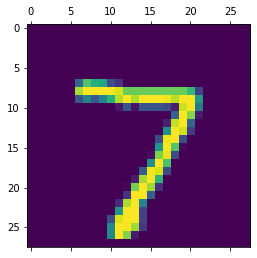

In [47]:
plt.matshow(x_test[0])

In [51]:
# To check the predicted value for that index number
np.argmax(y_predicted[0])

7

In [52]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [53]:
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [54]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    2,    0,    5,    9,    2,    1,    0],
       [   0, 1115,    2,    2,    0,    1,    4,    2,    9,    0],
       [   7,   11,  917,   19,    8,    5,   13,   10,   38,    4],
       [   2,    0,   17,  926,    1,   26,    2,    7,   20,    9],
       [   2,    1,    2,    1,  920,    0,   12,    3,   10,   31],
       [   9,    2,    1,   34,   10,  776,   18,    4,   32,    6],
       [  10,    3,    7,    1,    8,   13,  912,    2,    2,    0],
       [   1,    5,   21,    9,   11,    1,    0,  938,    3,   39],
       [   6,    8,    6,   26,    9,   26,   10,    8,  869,    6],
       [  11,    7,    1,   11,   32,    8,    0,   12,    6,  921]])>

Text(69.0, 0.5, 'Truth')

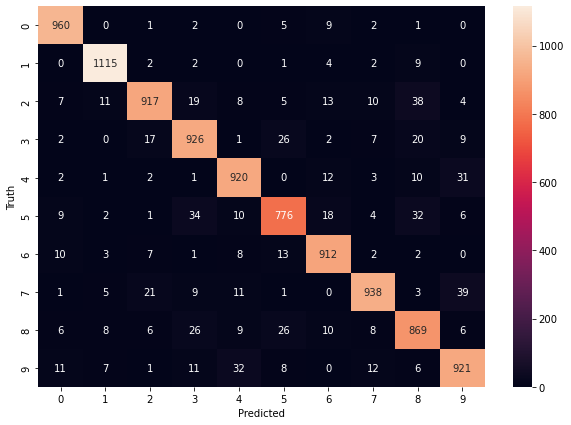

In [55]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Use of Hiden Layer

In [60]:
model_2 = keras.Sequential([
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])

model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
             metrics= ['accuracy'])
model_2.fit(x_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2231 - accuracy: 0.9347
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0896 - accuracy: 0.9729
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0588 - accuracy: 0.9822
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0415 - accuracy: 0.9872
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0310 - accuracy: 0.9897


In [61]:
model_2.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 1000us/step - loss: 0.0617 - accuracy: 0.9803


[0.06167040392756462, 0.9803000092506409]

In [62]:
y_predicted_model_2 = model_2.predict(x_test_flattened)
y_predicted_model_2[0]

313/313 [==============================] - 0s 798us/step


array([7.9702574e-04, 2.9606435e-05, 1.8032607e-01, 9.2033619e-01,
       5.6122968e-08, 1.2179725e-02, 2.6801377e-08, 9.9999624e-01,
       3.9514946e-03, 6.1648108e-02], dtype=float32)

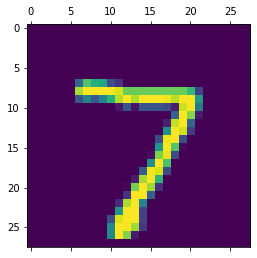

In [63]:
plt.matshow(x_test[0])

In [64]:
# To check the predicted value for that index number
np.argmax(y_predicted_model_2[0])

7

In [65]:
y_predicted_labels_model_2 = [np.argmax(i) for i in y_predicted_model_2]

In [66]:
cm_model_2 = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels_model_2)
cm_model_2

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    1,    0,    0,    0,    0,    2,    1,    2,    2],
       [   1, 1123,    4,    0,    0,    0,    3,    1,    3,    0],
       [   4,    0, 1011,    1,    1,    0,    2,    6,    6,    1],
       [   0,    0,    1,  986,    0,   12,    0,    2,    2,    7],
       [   1,    0,    2,    0,  961,    0,    4,    1,    1,   12],
       [   2,    0,    0,    4,    1,  881,    2,    0,    1,    1],
       [   3,    3,    0,    1,    3,   10,  933,    1,    4,    0],
       [   2,    5,    9,    2,    0,    0,    0, 1002,    3,    5],
       [   3,    0,    2,    8,    2,    8,    0,    5,  941,    5],
       [   0,    2,    0,    4,    5,    3,    0,    2,    0,  993]])>

Text(69.0, 0.5, 'Truth')

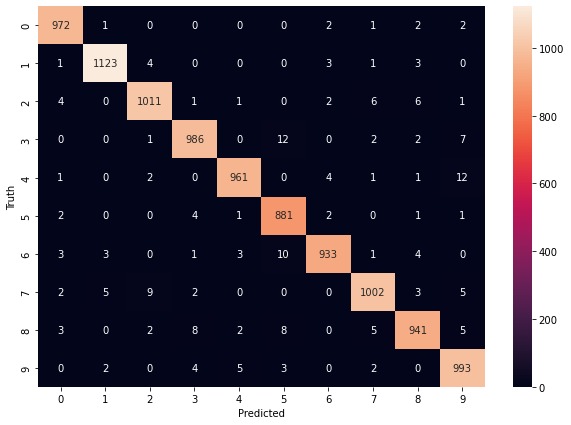

In [67]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_model_2 , annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [68]:
cm_normalized = cm / np.sum(cm, axis=1, keepdims=True)
cm_model_2_normalized = cm_model_2 / np.sum(cm_model_2, axis=1, keepdims=True)


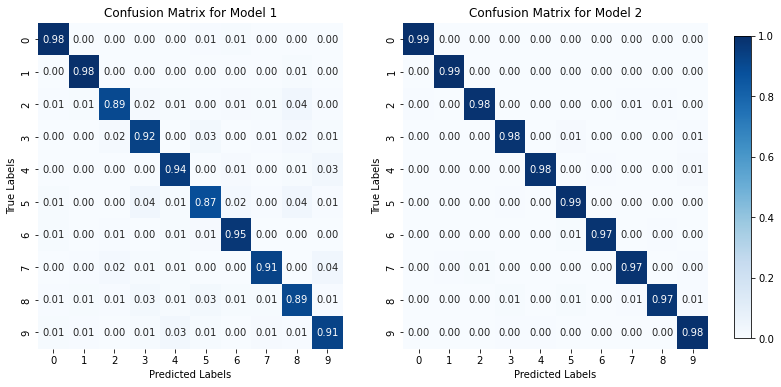

In [74]:
# Create a color map with more gradations
cmap = sns.color_palette("Blues", as_cmap=True)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first heatmap with improved visualization
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap=cmap, ax=axs[0], cbar=False)
axs[0].set_title("Confusion Matrix for Model 1")
axs[0].set_xlabel("Predicted Labels")
axs[0].set_ylabel("True Labels")

# Plot the second heatmap with improved visualization
sns.heatmap(cm_model_2_normalized, annot=True, fmt=".2f", cmap=cmap, ax=axs[1], cbar=False)
axs[1].set_title("Confusion Matrix for Model 2")
axs[1].set_xlabel("Predicted Labels")
axs[1].set_ylabel("True Labels")

# Add color bars to the subplots
cbar_ax = fig.add_axes([0.93, 0.15, 0.02, 0.7])  # Adjust the position and size of the color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
fig.colorbar(sm, cax=cbar_ax)

# Add more space between the subplots

plt.show()